# Gaussian gradient filters

In [3]:
import math
import os
import matplotlib.pyplot as plt
import nibabel
import numpy as np

from ia_mri_tools.filters import gradient


plt.ion()
plt.style.use('seaborn-white')

def im_show(h, n, m, i, title=None, colorbar=True, vmin=-100, vmax=100):
    plt.subplot(n, m, i)
    plt.imshow(h[:, ::-1].transpose(), cmap='gray', vmin=vmin, vmax=vmax)
    plt.axis('off')
    if title:
        plt.title(title)
    if colorbar:
        plt.colorbar()


def im_show_scale(h, n, m, i, title=None, colorbar=True, pmin=2, pmax=98):
    plt.subplot(n, m, i)
    plt.imshow(h[:, ::-1].transpose(), cmap='gray', vmin=np.percentile(h, pmin), vmax=np.percentile(h, pmax))
    plt.axis('off')
    if title:
        plt.title(title)
    if colorbar:
        plt.colorbar()


def load_data(dset, z=None, data_path='data/HCP/100307'):
    """

    :param dset: string 'T1', 'T2', 'T1r', 'T2r', or 'aparc+aseg'
    :param z: integer slice number
    :param data_path: path to the data
    :return: data as a numpy array
    """

    if dset == 'T1':
        dset_path = os.path.join(data_path, 'T1w_acpc_dc.nii.gz')
    elif dset == 'T2':
        dset_path = os.path.join(data_path, 'T2w_acpc_dc.nii.gz')
    elif dset == 'T1r':
        dset_path = os.path.join(data_path, 'T1w_acpc_dc_restore.nii.gz')
    elif dset == 'T2r':
        dset_path = os.path.join(data_path, 'T2w_acpc_dc_restore.nii.gz')
    elif dset == 'aparc+aseg':
        dset_path = os.path.join(data_path, 'aparc+aseg.nii.gz')
    else:
        raise NameError('Unknown data set name.')

    # read the volume
    data = nibabel.load(dset_path).get_data()
    # select a slice if needed
    if z:
        data = data[:, :, z]

    return data



## Gaussian gradient filtering of an image

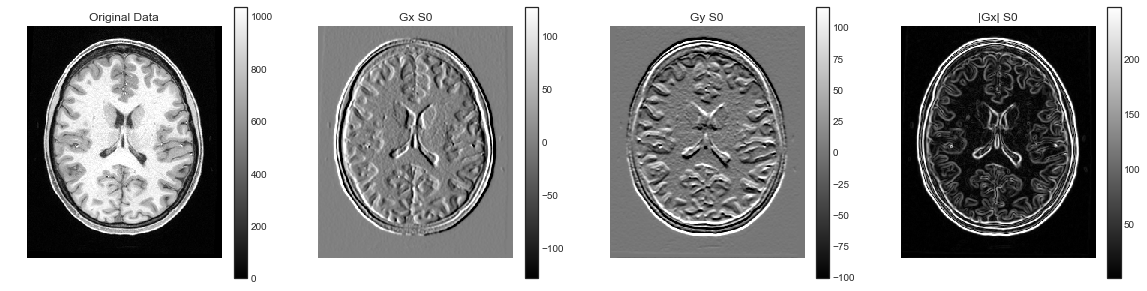

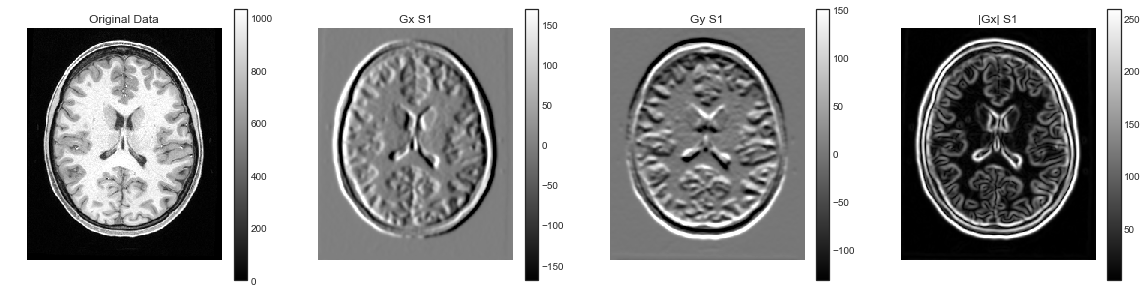

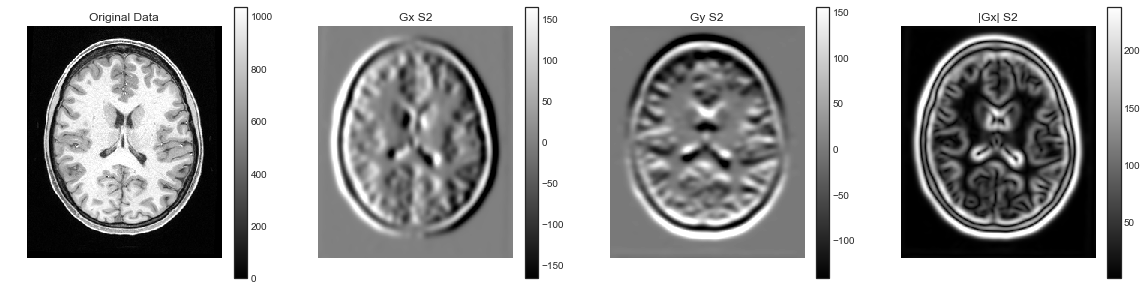

In [10]:
# Load a slice from an image and convert to doubles.
data = load_data('T1r', z=120).astype(np.float)

# Compute at several scales
for scale in range(3):
    gx, gy = gradient(data, scale=scale)
    g = np.sqrt(gx**2 + gy**2)
    plt.figure(figsize=[20,5])
    im_show_scale(data, 1,4,1, 'Original Data')
    im_show_scale(gx, 1,4,2, f'Gx S{scale}')
    im_show_scale(gy, 1,4,3, f'Gy S{scale}')
    im_show_scale(g,  1,4,4, f'|Gx| S{scale}')

## Compute along any direction via rotation

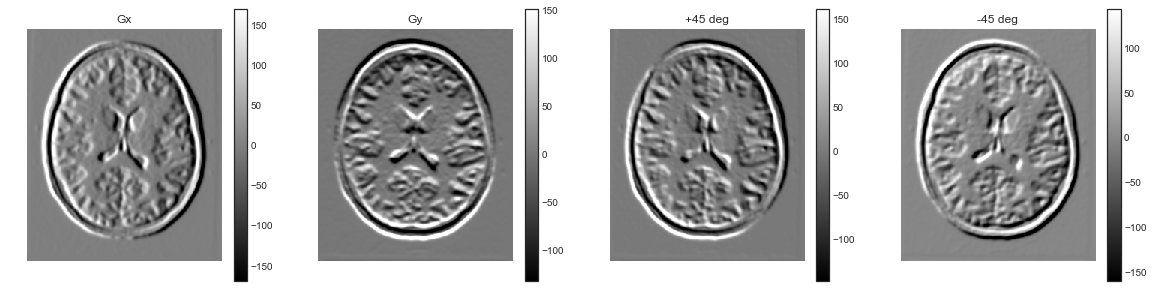

In [13]:
scale = 1
gx, gy = gradient(data, scale=scale)
gp = 1/math.sqrt(2)*gx + 1/math.sqrt(2)*gy
gn = 1/math.sqrt(2)*gx - 1/math.sqrt(2)*gy

plt.figure(figsize=[20,5])
im_show_scale(gx, 1,4,1, 'Gx')
im_show_scale(gy, 1,4,2, 'Gy')
im_show_scale(gp, 1,4,3, '+45 deg')
im_show_scale(gn, 1,4,4, '-45 deg')
